In [1]:
import numpy as np
from scipy.integrate import quad
def erf_asy(x):
    a1, a2, a3, a4, a5 = 0.254829592, -0.284496736, 1.421413741, -1.453152027, 1.061405429
    p = 0.3275911

    sign = np.sign(x)  # Element-wise sign function
    x = np.abs(x)
    t = 1 / (1 + p * x)
    y = 1 - (((((a5 * t + a4) * t + a3) * t + a2) * t + a1) * t * np.exp(-x * x))
    return sign * y



def phi(x):
    return 0.5 * (1 + np.erf(x / np.sqrt(2)))

from scipy.special import erfinv

def phi_inv(p):
    return np.sqrt(2) * erfinv(2*p - 1)


def my_integrand(z, rho, A):
    den = np.sqrt(2*(1 - rho**2)) + 1e-8  # avoid zero divide
    temp = (A - np.sqrt(2)*rho*z) / den
    return np.exp(-z**2) * erf_asy(temp)

def Integrat_quad(a, b, rho, A):
    f = lambda z: my_integrand(z, rho, A)
    val ,error= quad(f, a, b,limit=10000)
    return val


def f1(x):
    return np.exp(-x**2)*erf_asy((A-rho*x*np.sqrt(2))/np.sqrt(2*(1-rho**2)))


# print(erf_asy(0))

In [2]:
from scipy.stats import norm
y = 10
scale0, scale1 = 7, 9#xm parameter
shape0, shape1 = 5, 5#tail(alpha) parameter

def F_Y1(y,scale1,shape1):
    temp=(scale1/y)**shape1
    return 1-temp

def F_Y0(y,scale0,shape0):
    temp=(scale0/y)**shape0
    return 1-temp


u0 = F_Y0(y,scale0,shape0)
u1 = F_Y1(y,scale1,shape1)


def PNS(y,rho,u0,u1):
    A=phi_inv(u0)
    B=phi_inv(u1)/np.sqrt(2)
    c1=(1-erf_asy(B))/4
    c2=Integrat_quad(B,np.inf,rho,A)/(2*np.sqrt(np.pi))
    return c1+c2



def PS(y,rho,u0,u1):
    A=phi_inv(u0)
    ans_num=PNS(y,rho,u0,u1)
    ans_den=0.5+Integrat_quad(-np.inf,np.inf,rho,A)/(2*np.sqrt(np.pi))
    return ans_num/ans_den
def PN(y,rho,u0,u1):
    B=phi_inv(u1)/np.sqrt(2)
    A=phi_inv(1)
    ans_den=0.25*(1+erf_asy(B))
    ans_den+=Integrat_quad(-np.inf,B,rho,A)/(2*np.sqrt(np.pi))
    ans_den=1-ans_den
    ans_num=PNS(y,rho,u0,u1)
    return ans_num/ans_den

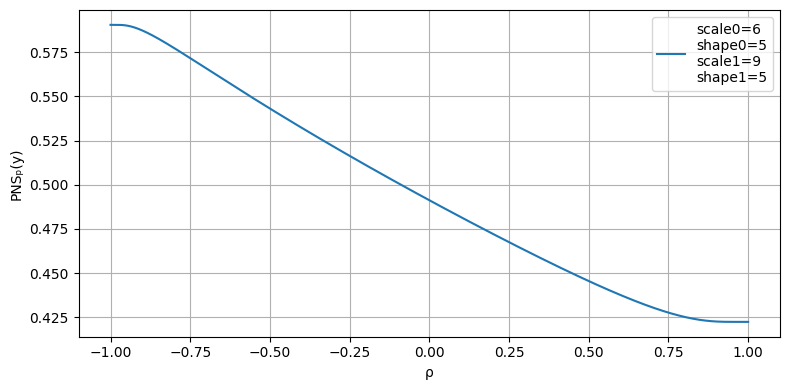

In [3]:
rhos = np.linspace(-0.9999, 0.9999, 2000)
PN_vals=[PN(y,r,u0,u1) for r in rhos]
PS_vals=[PS(y,r,u0,u1) for r in rhos]
PNS_vals = [PNS(y,r,u0,u1) for r in rhos]
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(rhos, PNS_vals, '-', label='scale0=6\nshape0=5\nscale1=9\nshape1=5')

ax.set_xlabel('ρ')
ax.set_ylabel('PNSₚ(y)')
ax.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

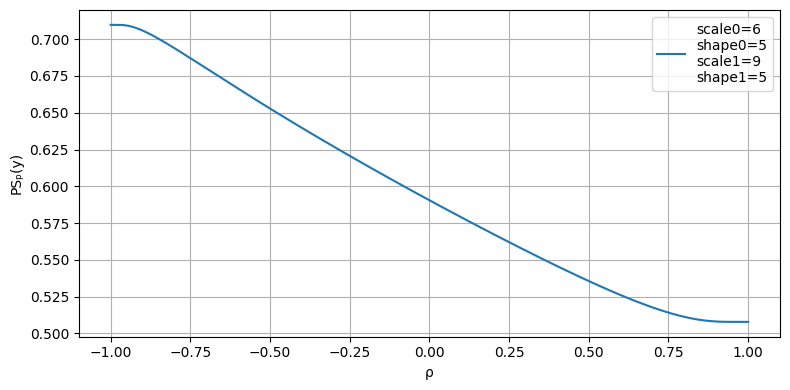

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(rhos, PS_vals, '-', label='scale0=6\nshape0=5\nscale1=9\nshape1=5')

ax.set_xlabel('ρ')
ax.set_ylabel('PSₚ(y)')
ax.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

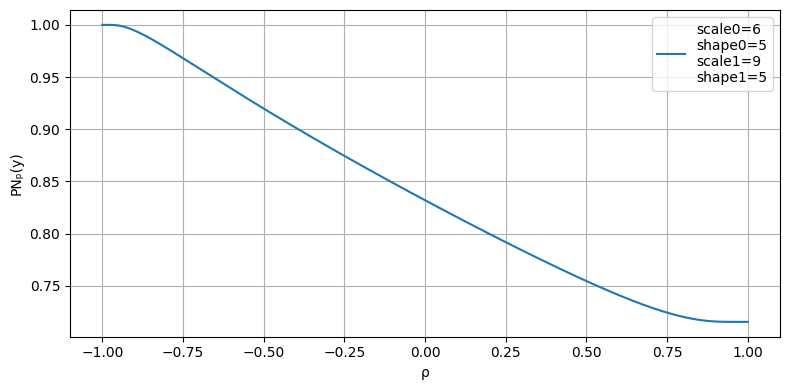

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(rhos, PN_vals, '-', label='scale0=6\nshape0=5\nscale1=9\nshape1=5')

ax.set_xlabel('ρ')
ax.set_ylabel('PNₚ(y)')
ax.legend()
plt.grid(True)
plt.tight_layout()

plt.show()